In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


<h2> <center>Feature Preprocessing<br></h2>
<h4><center> To Rescale our data to make usefull to neural network</center>
<h3>Categorical Features</h3>
<h4>Its help when we want more catagorical lebel or output as their lebel.

In [6]:
df = pd.read_csv('/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
pd.get_dummies(df['Gender'], prefix='Gender').head() # on column Gender # df['Gender]

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [9]:
df['Gender'].unique() #  how many types of data has column 1

array(['Male', 'Female'], dtype=object)

<h2> <center>Feature transformation<br></h2>
<h4><center> ** Neural Network works good on 0 to 1 or close to 1 value **

<h2><center>1) Rescale with fixed factor</h2>

In [10]:
df[['Height (feet)']] = df[['Height']] / 12.0
df[['Weight (100 lbs)']] = df[['Weight']] / 100.0
df.head()

,Gender,Height,Weight,Height (feet),Weight (100 lbs)
0,Male,73.847017,241.893563,6.153918,2.418936
1,Male,68.781904,162.310473,5.731825,1.623105
2,Male,74.110105,212.740856,6.175842,2.127409
3,Male,71.730978,220.042470,5.977582,2.200425
4,Male,69.881796,206.349801,5.823483,2.063498


In [11]:
df.describe().round(2) # information about the data set

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


<h2><center>2) MinMax normalization</h2>
<h4><center>If we want to exactly between 0 to 1 value

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mms = MinMaxScaler();
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


<h2><center>3) Standard normalization</h2>
<h4><center>Min of that data will be 0<br> Standard deviation of that data is 1

In [0]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,-0.00,-0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


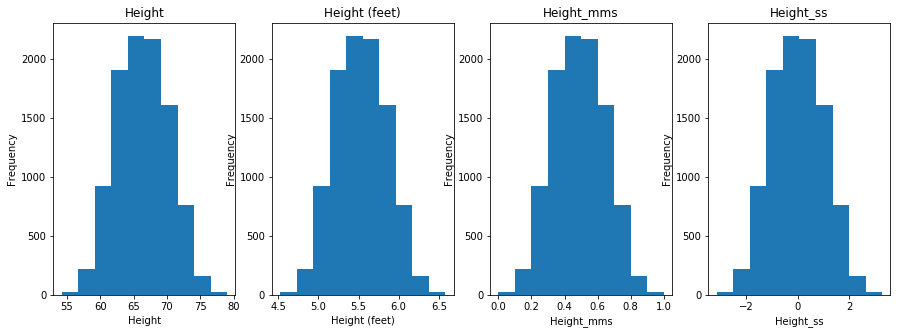

In [22]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
  plt.subplot(1, 4, i+1)
  df[feature].plot(kind='hist', title=feature)
  plt.xlabel(feature)